IMPORTING THE DEPENDENCIES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import gridspec

LOADING THE DATASET TO A PANDAS DATAFRAME

In [ ]:
credit_card_data = pd.read_csv('/content/drive/MyDrive/CCFD/creditcard.csv')

DISPLAYING THE FIRST 5 ROWS OF THE DATASET

In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


DISPLAYING THE LAST 5 ROWS OF THE DATASET

In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


DISPLAYING THE INFORMATION OF THE DATASET

In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

CHECKING THE NUMBER OF MISSING VALUES IN EACH COLUMN

In [ ]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

DISTRIBUTION OF LEGIT TRANSACTIONS AND FRAUDULENT TRANSACTIONS

In [ ]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

0 --> Normal Transaction

1 --> Fraudulent Transaction



SEPARATING THE DATA FOR ANALYSIS

In [ ]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
print("Proportion of Fraudulent Cases:"+str(len(credit_card_data[credit_card_data["Class"] == 1])/credit_card_data.shape[0]))

Proportion of Fraudulent Cases:0.001727485630620034


DATA VISUALISATION

<Axes: ylabel='count'>

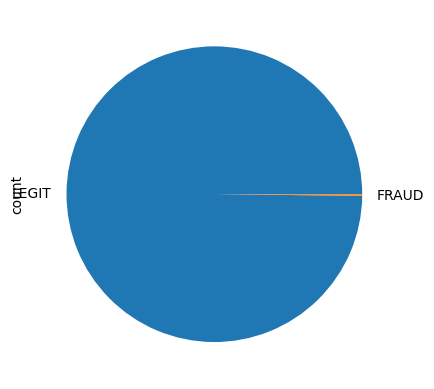

In [ ]:
data_p=credit_card_data.copy()
data_p[" "]=np.where(data_p["Class"] == 1 ,"FRAUD","LEGIT")

#PLOTTING A PIE-CHART
data_p[" "].value_counts().plot(kind="pie")

<ipython-input-15-b60b74091944>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_value, hist=False, color="m", kde_kws={"shade": True}, ax=axes[0]).set_title("DISTRIBUTION OF AMOUNT")
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-15-b60b74091944>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either

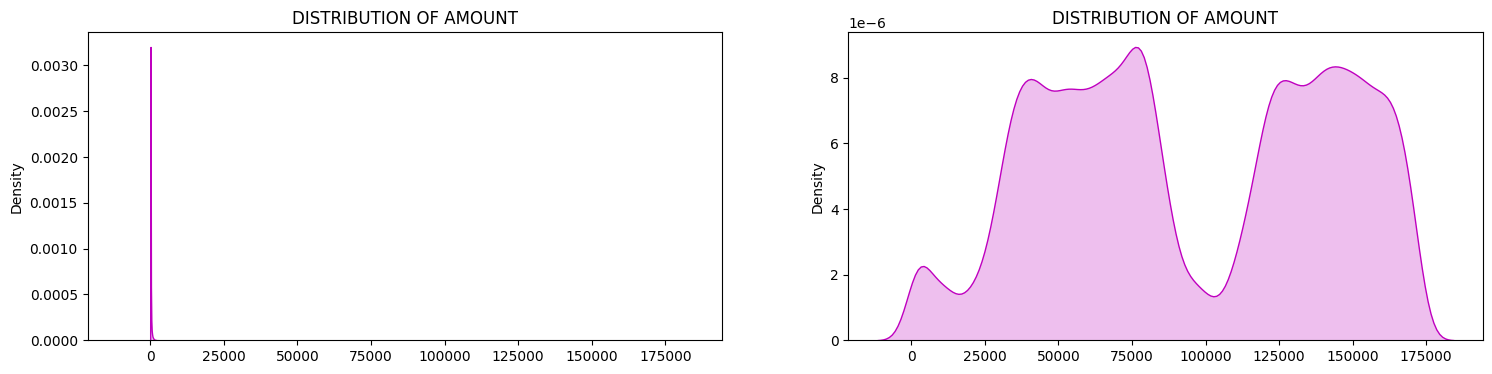

In [ ]:
f,axes = plt.subplots(1, 2, figsize=(18,4), sharex = True)
amount_value =credit_card_data['Amount'].values
time_value =credit_card_data['Time'].values
sns.distplot(amount_value, hist=False, color="m", kde_kws={"shade": True}, ax=axes[0]).set_title("DISTRIBUTION OF AMOUNT")
sns.distplot(time_value, hist=False, color="m", kde_kws={"shade": True}, ax=axes[1]).set_title("DISTRIBUTION OF AMOUNT")
plt.show()

In [ ]:
print("SUMMARY OF THE FEATURE-AMOUNT"+"\n-------------------------------")
print(credit_card_data["Amount"].describe())

SUMMARY OF THE FEATURE-AMOUNT
-------------------------------
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


<ipython-input-17-72b981f734e9>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-17-72b981f734e9>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-l

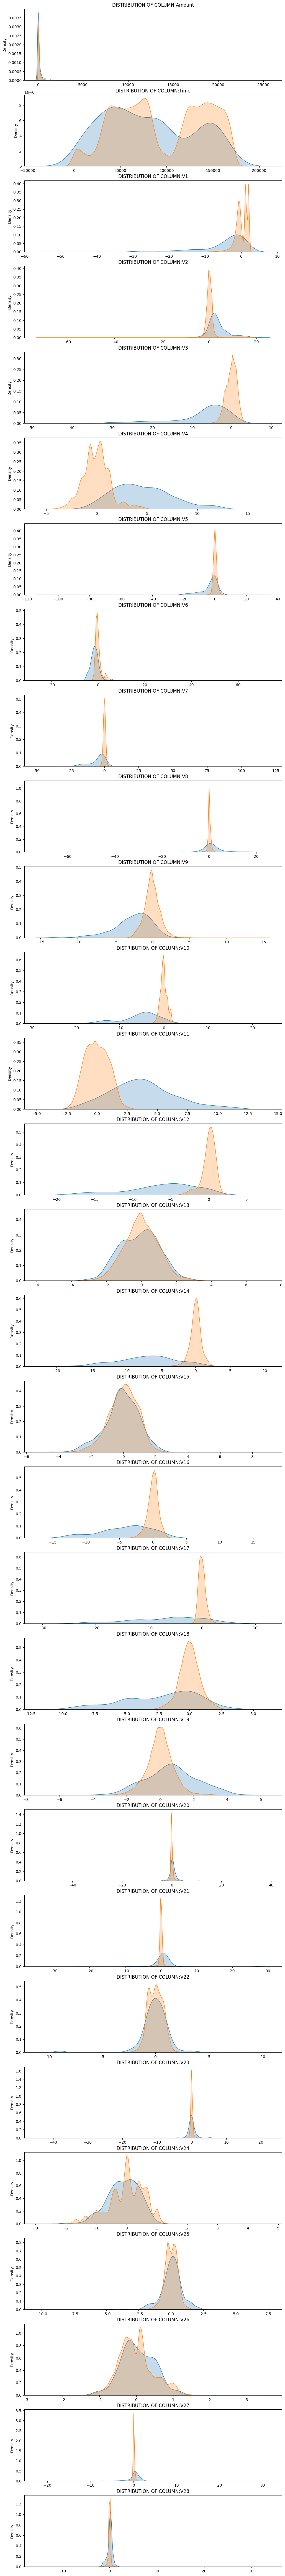

In [ ]:
data_plot =credit_card_data.copy()
amount = data_plot['Amount']
data_plot.drop(labels=['Amount'], axis=1, inplace = True)
data_plot.insert(0, 'Amount', amount)
columns = data_plot.iloc[:,0:30].columns
plt.figure(figsize=(12,30*4))
grids = gridspec.GridSpec(30, 1)
for grid, index in enumerate(data_plot[columns]):
 ax = plt.subplot(grids[grid])
 sns.distplot(data_plot[index][data_plot.Class == 1], hist=False, kde_kws={"shade": True}, bins=50)
 sns.distplot(data_plot[index][data_plot.Class == 0], hist=False, kde_kws={"shade": True}, bins=50)
 ax.set_xlabel("")
 ax.set_title("DISTRIBUTION OF COLUMN:"+str(index))
plt.show()

STATISTICAL MEASURES OF THE DATA

In [ ]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

COMPARING THE VALUES FOR BOTH THE TRANSACTIONS

In [ ]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


UNDER-SAMPLING

BUILDING A SAMPLE DATASET CONTAINING SIMILAR DISTRIBUTIONS OF LEGIT TRANSACTIONS AND FRAUDULENT TRANSACTIONS

NUMBER OF FRAUDULENT TRANSACTIONS-->492



In [ ]:
legit_sample = legit.sample(n=492)

CONCATENATING TWO DATAFRAMES

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

DISPLAYING THE FIRST 5 ROWS OF THE NEW DATASET CREATED

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46572,42841.0,1.138906,-0.145367,0.522346,0.528486,-0.452280,-0.172054,-0.126709,-0.042251,0.560817,...,-0.040005,0.149759,-0.088715,0.191973,0.488075,0.694070,-0.016303,0.010994,37.28,0
275211,166424.0,2.025286,0.144453,-1.565464,1.383781,0.330481,-1.097301,0.534265,-0.342448,0.380691,...,0.000810,0.177005,0.032700,-0.111325,0.374764,-0.528319,-0.017363,-0.062259,9.95,0
136162,81575.0,1.132517,0.219582,0.607532,1.057269,-0.233762,-0.175519,-0.060807,-0.018491,-0.287757,...,-0.015808,-0.077746,-0.061980,0.014733,0.455757,-0.483145,0.031564,0.026191,36.00,0
28305,34943.0,-0.732631,-0.529750,1.102282,-1.545637,-0.391734,-1.304710,0.575250,-0.215097,-0.979466,...,-0.458587,-1.111937,0.522585,0.516476,-0.415436,-0.873735,0.136420,0.163900,122.25,0
100018,67387.0,-1.484262,1.016035,1.428044,-1.210613,0.155023,0.192432,0.202025,0.610596,-0.869311,...,0.104264,0.048405,-0.225493,-0.209631,0.039721,0.838592,-0.388818,-0.078932,12.54,0


DISPLAYING THE LAST 5 ROWS OF THE NEW DATASET CREATED

In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94487.000000,-0.042123,-0.071988,-0.000044,0.000121,-0.070489,-0.025973,0.062306,0.046629,-0.066091,...,0.050165,0.009506,-0.019907,0.032559,0.009201,0.026838,-0.003436,-0.002660,0.037639,111.779776
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


SPLITTING THE DATA INTO FEATURES AND TARGETS

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
46572    42841.0  1.138906 -0.145367  0.522346  0.528486 -0.452280 -0.172054   
275211  166424.0  2.025286  0.144453 -1.565464  1.383781  0.330481 -1.097301   
136162   81575.0  1.132517  0.219582  0.607532  1.057269 -0.233762 -0.175519   
28305    34943.0 -0.732631 -0.529750  1.102282 -1.545637 -0.391734 -1.304710   
100018   67387.0 -1.484262  1.016035  1.428044 -1.210613  0.155023  0.192432   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

46572     0
275211    0
136162    0
28305     0
100018    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


SPLITTING THE DATA INTO TRAINING DATA AND TESTING DATA

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


MODEL TRAINING

LOGISTIC REGRESSION

In [ ]:
model = LogisticRegression()

TRAINING THE LOGISTIC REGRESSION MODEL WITH TRAINING DATA

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

MODEL EVALUATION

ACCURACY SCORE

ACCURACY ON TRAINING DATA

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print("ACCURACY ON TRAINING DATA:",training_data_accuracy)

ACCURACY ON TRAINING DATA: 0.9466327827191868


ACCURACY ON TEST DATA

In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print("ACCURACY ON TEST DATA:",test_data_accuracy)

ACCURACY ON TEST DATA: 0.934010152284264


In [ ]:
import pickle

In [ ]:
with open('pickle1.pkl', 'wb') as file:
    pickle.dump(model, file)

# Debugging completed
print("Model saved as 'model.pkl'")

Model saved as 'model.pkl'


In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Load your data
# X, y = load_your_data()

# Create a pipeline with scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(class_weight='balanced'))

# Train the pipeline
pipeline.fit(X_train, Y_train)

# Save the pipeline (this includes both the scaler and the model)
joblib.dump(pipeline, 'fraud_model_pipeline.pkl')
with open('fraud_model_pipeline.pkl', 'wb') as file:
    pickle.dump(model, file)

# Debugging completed
print("Model saved as '.pkl'")

NameError: name 'X_train' is not defined

In [ ]:
import gradio as gr
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample data
data = {
    'Time': [0.0, 0.0, 1.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0],
    'V1': [-1.359807, 1.191857, -1.358354, -0.966272, -1.158233, -0.632269, 1.233843, -1.000000, 0.374997, -0.495657],
    'V2': [-0.072781, 0.266151, -1.340163, -0.185226, 0.877737, -0.288196, 0.245563, -0.565658, 0.367364, -0.442332],
    'V3': [2.536347, 0.166480, 1.773209, 1.792993, 1.548718, 1.234214, 0.786812, 1.263293, -0.274978, 0.637382],
    'V4': [1.378155, 0.448154, 0.379780, -0.863291, 0.403034, 0.473314, -0.324385, 0.546728, 0.879887, 0.264591],
    'V5': [-0.338321, 0.060018, -0.503198, -0.010309, -0.407193, -0.402800, 0.297455, -0.454312, -0.526097, 0.284519],
    'V6': [0.462388, -0.082361, 1.800499, 1.247203, 0.095921, 0.256794, 0.095865, 0.241694, 0.874375, -0.194308],
    'V7': [0.239599, -0.078803, 0.791461, 0.237609, 0.592941, 0.197074, 0.457091, 0.324658, -0.073682, 0.329942],
    'V8': [0.098698, 0.085102, 0.247676, 0.377436, -0.270533, 0.073496, -0.258201, 0.389569, 0.164407, -0.321419],
    'V9': [0.363787, -0.255425, -1.514654, -1.387024, 0.817739, -1.498276, -0.274033, -0.548737, -0.258334, 0.124124],
    'Amount': [149.62, 2.69, 378.66, 123.50, 69.99, 100.00, 50.00, 75.00, 200.00, 150.00],
    'Class': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
}
credit_card_data = pd.DataFrame(data)

# Split the dataset
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
new_dataset = pd.concat([legit.sample(frac=1, random_state=42), fraud], axis=0)

X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Function to make predictions
def predict_fraud(Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount):
    input_data = [[Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount]]
    prediction = model.predict(input_data)[0]
    return "Fraudulent" if prediction == 1 else "Not Fraudulent"

# Create the Gradio interface
interface = gr.Interface(fn=predict_fraud,
                         inputs=["number", "number", "number", "number", "number", "number",
                                 "number", "number", "number", "number", "number", "number",
                                 "number", "number", "number", "number", "number", "number",
                                 "number", "number", "number", "number", "number", "number",
                                 "number", "number", "number", "number", "number", "number"],
                         outputs="text",
                         title="Credit Card Fraud Detection",
                         description="Enter the values for each feature to predict if the transaction is fraudulent or not.")
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://43b140a2f16f363e82.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
